In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-oct-2022/train_9.csv
/kaggle/input/tabular-playground-series-oct-2022/train_3.csv
/kaggle/input/tabular-playground-series-oct-2022/train_4.csv
/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_8.csv
/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_5.csv
/kaggle/input/tabular-playground-series-oct-2022/train_2.csv
/kaggle/input/tabular-playground-series-oct-2022/test.csv
/kaggle/input/tabular-playground-series-oct-2022/train_0.csv
/kaggle/input/tabular-playground-series-oct-2022/train_7.csv
/kaggle/input/tabular-playground-series-oct-2022/train_1.csv
/kaggle/input/tabular-playground-series-oct-2022/train_6.csv


### Imports

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Load the data

In [60]:
dtypes_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv')
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}
train0_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_0.csv', dtype=dtypes)

In [61]:
pd.set_option('display.max_columns', 61)

In [62]:
train0_df.shape

(2149381, 61)

In [63]:
train0_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149381 entries, 0 to 2149380
Data columns (total 61 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   game_num                     int32  
 1   event_id                     int32  
 2   event_time                   float32
 3   ball_pos_x                   float32
 4   ball_pos_y                   float32
 5   ball_pos_z                   float32
 6   ball_vel_x                   float32
 7   ball_vel_y                   float32
 8   ball_vel_z                   float32
 9   p0_pos_x                     float32
 10  p0_pos_y                     float32
 11  p0_pos_z                     float32
 12  p0_vel_x                     float32
 13  p0_vel_y                     float32
 14  p0_vel_z                     float32
 15  p0_boost                     float16
 16  p1_pos_x                     float32
 17  p1_pos_y                     float32
 18  p1_pos_z                     float32
 19  

In [64]:
train0_df.columns

Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec'],
      dtype='object')

In [65]:
train0_df.head()

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,p0_vel_y,p0_vel_z,p0_boost,p1_pos_x,p1_pos_y,p1_pos_z,p1_vel_x,p1_vel_y,p1_vel_z,p1_boost,p2_pos_x,p2_pos_y,p2_pos_z,p2_vel_x,p2_vel_y,p2_vel_z,p2_boost,p3_pos_x,p3_pos_y,p3_pos_z,p3_vel_x,p3_vel_y,p3_vel_z,p3_boost,p4_pos_x,p4_pos_y,p4_pos_z,p4_vel_x,p4_vel_y,p4_vel_z,p4_boost,p5_pos_x,p5_pos_y,p5_pos_z,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1,1002,-33.313030,-0.0,0.0,1.8548,-0.0,0.0,0.0,41.804798,-51.924999,0.3402,5.635400,-4.8490,0.0042,33.34375,-5.0654,-75.519402,0.3402,0.3602,9.960600,0.0000,27.328125,-39.654400,-49.894398,0.3402,8.8092,8.809400,0.0000,22.343750,5.0604,75.532005,0.3402,-0.5236,-8.050600,0.0042,33.34375,-41.766403,52.006401,0.3410,-5.437600,5.437800,0.0052,33.34375,39.757401,49.821602,0.3402,-8.227600,-9.275200,-0.0002,22.343750,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
1,1,1002,-33.206146,-0.0,0.0,1.8548,-0.0,0.0,0.0,42.261600,-52.451202,0.3402,5.287199,-7.4774,0.0042,33.34375,-4.9298,-74.326401,0.4900,2.2634,13.568199,6.0700,23.843750,-38.626202,-48.871803,0.3402,11.6062,11.244201,0.0000,30.625000,5.0110,74.772995,0.3402,-0.6998,-9.942000,0.0042,33.34375,-42.407204,52.622402,0.5944,-7.172400,6.739800,6.2394,33.34375,38.781399,48.761402,0.3402,-11.337800,-11.244000,0.0002,30.625000,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
2,1,1002,-33.098114,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.227001,-54.054001,1.1466,5.686000,-9.7462,6.5052,33.34375,-4.6880,-72.959000,1.0820,2.7758,15.537000,6.3438,23.140625,-36.345200,-47.016201,1.1346,16.1252,12.458200,6.2390,26.890625,4.9168,73.767601,0.3402,-1.1922,-11.803600,0.0042,33.34375,-43.778198,54.081402,1.6450,-12.416600,15.706600,6.0082,33.34375,36.503998,46.920601,1.0214,-16.357201,-12.203199,6.2126,26.890625,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
3,1,1002,-32.993191,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.898399,-55.225601,1.5936,10.595600,-18.5704,5.5184,33.34375,-3.8408,-69.125801,1.9106,5.6770,25.291800,4.2014,23.140625,-35.173599,-45.287998,1.5598,15.8896,26.249199,5.1802,23.375000,4.6906,71.631401,0.4394,-1.7122,-15.544201,5.9916,31.00000,-44.919800,55.525200,2.1334,-12.483199,15.779799,4.7494,33.34375,35.151798,44.873398,1.5286,-14.602800,-26.306002,4.9346,23.375000,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
4,1,1002,-32.887756,-0.0,0.0,1.8548,-0.0,0.0,0.0,44.960602,-57.087799,2.0720,10.632600,-18.6378,4.1670,33.34375,-3.2720,-66.594398,1.9814,5.6902,25.318401,-0.3020,23.140625,-34.066002,-43.518997,1.8632,17.1810,26.739599,4.0358,19.843750,4.5010,69.921600,1.0822,-2.0104,-18.120399,6.3364,27.46875,-46.170399,57.104401,2.2552,-12.518800,15.799200,-0.2730,33.34375,33.584801,42.203400,1.9106,-16.576401,-27.024799,1.3248,19.843750,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0


In [66]:
train0_df.describe()

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,p0_vel_y,p0_vel_z,p0_boost,p1_pos_x,p1_pos_y,p1_pos_z,p1_vel_x,p1_vel_y,p1_vel_z,p1_boost,p2_pos_x,p2_pos_y,p2_pos_z,p2_vel_x,p2_vel_y,p2_vel_z,p2_boost,p3_pos_x,p3_pos_y,p3_pos_z,p3_vel_x,p3_vel_y,p3_vel_z,p3_boost,p4_pos_x,p4_pos_y,p4_pos_z,p4_vel_x,p4_vel_y,p4_vel_z,p4_boost,p5_pos_x,p5_pos_y,p5_pos_z,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
count,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.130390e+06,2.130390e+06,2.130390e+06,2.130390e+06,2.130390e+06,2.130390e+06,2.130390e+06,2.130761e+06,2.130761e+06,2.130761e+06,2.130761e+06,2.130761e+06,2.130761e+06,2.130761e+06,2.129864e+06,2.129864e+06,2.129864e+06,2.129864e+06,2.129864e+06,2.129864e+06,2.129864e+06,2.129551e+06,2.129551e+06,2.129551e+06,2.129551e+06,2.129551e+06,2.129551e+06,2.129551e+06,2.130850e+06,2.130850e+06,2.130850e+06,2.130850e+06,2.130850e+06,2.130850e+06,2.130850e+06,2.130318e+06,2.130318e+06,2.130318e+06,2.130318e+06,2.130318e+06,2.130318e+06,2.130318e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06
mean,3.678573e+02,3.678601e+05,-6.615075e+01,-1.711843e-01,-8.701598e-03,1.566230e+01,-3.763221e-03,2.237859e-02,1.148253e-01,-8.151917e-02,-1.941014e+01,3.481089e+00,1.250747e-02,1.053602e+00,4.777012e-02,NaN,-3.635506e-01,-1.999821e+01,3.482019e+00,-1.238807e-02,1.046837e+00,5.177271e-02,NaN,-4.969762e-02,-1.968855e+01,3.477881e+00,1.572069e-02,1.065000e+00,5.082176e-02,NaN,-3.649736e-02,2.005644e+01,3.453079e+00,-2.541819e-03,-1.032868e+00,5.071225e-02,NaN,4.000194e-01,1.952144e+01,3.463678e+00,-4.216412e-03,-1.041858e+00,5.324022e-02,NaN,-1.090842e-01,1.939479e+01,3.472399e+00,-1.913264e-03,-1.009229e+00,4.875839e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.604489e+00,5.831074e-02,5.575280e-02
std,2.125500e+02,2.125501e+05,6.682579e+01,4.909460e+01,6.008009e+01,1.044591e+01,2.316391e+01,2.806578e+01,1.228911e+01,4.550489e+01,5.856254e+01,6.496314e+00,2.106154e+01,2.429429e+01,6.281563e+00,0.000000e+00,4.556408e+01,5.846065e+01,6.494385e+00,2.102601e+01,2.432646e+01,6.300074e+00,0.000000e+00,4.559604e+01,5.839082e+01,6.500242e+00,2.103716e+01,2.431145e+01,6.322643e+00,0.000000e+00,4.532089e+01,5.823130e+01,6.476541e+00,2.098336e+01,2.422151e+01,6.279982e+00,0.000000e+00,4.561946e+01,5.840764e+01,6.460821e+00,2.103703e+01,2.430424e+01,6.276272e+00,0.000000e+00,4.569713e+01,5.839080e+01,6.499697e+00,2.108474e+01,2.429656e+01,6.314331e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.080762e+00,2.343302e-01,2.294438e-01
min,1.000000e+00,1.002000e+03,-7.205285e+02,-8.079200e+01,-1.043092e+02,1.296000e+00,-9.920059e+01,-8.797200e+01,-6.299300e+01,-8.189000e+01,-1.198200e+02,2.640000e-02,-4.600000e+01,-4.600000e+01,-4.584820e+01,0.000000e+00,-8.189340e+01,-1.198002e+02,3.820000e-02,-4.600000e+01,-4.599980e+01,-4.586900e+01,0.000000e+00,-8.189540e+01,-1.197880e+02,2.820000e-02,-4.599980e+01,-4.600000e+01,-4.598780e+01,0.000000e+00,-8.191759e+01,-1.198110e+02,3.200000e-03,-4.599980e+01,-4.599980e+01,-4.471800e+01,0.000000e+00,-8.192720e+01,-1.197838e+02,4.740000e-02,-4.600000e+01,-4.599980e+01,-4.556300e+01,0.000000e+00,-8.190660e+01,-1.197722e+02,2.780000e-02,-4.599980e+01,-4.599980e+01,-4.532840e+01,0.000000e+00,-9.984375e+00,-9.984375e+00,-9.968750e+00,-9.984375e+00,-9.968750e+00,-9.968750e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,1.830000e+02,1.830040e+05,-9.148513e+01,-4.498640e+01,-5.354000e+01,6.395000e+00,-1.558660e+01,-2.184260e+01,-7.648400e+00,-3.730970e+01,-7.210580e+01,3.402000e-01,-1.598280e+01,-1.829860e+01,-2.978000e-01,1.332031e+01,-3.765680e+01,-7.255560e+01,3.402000e-01,-1.593360e+01,-

### Simple visualization

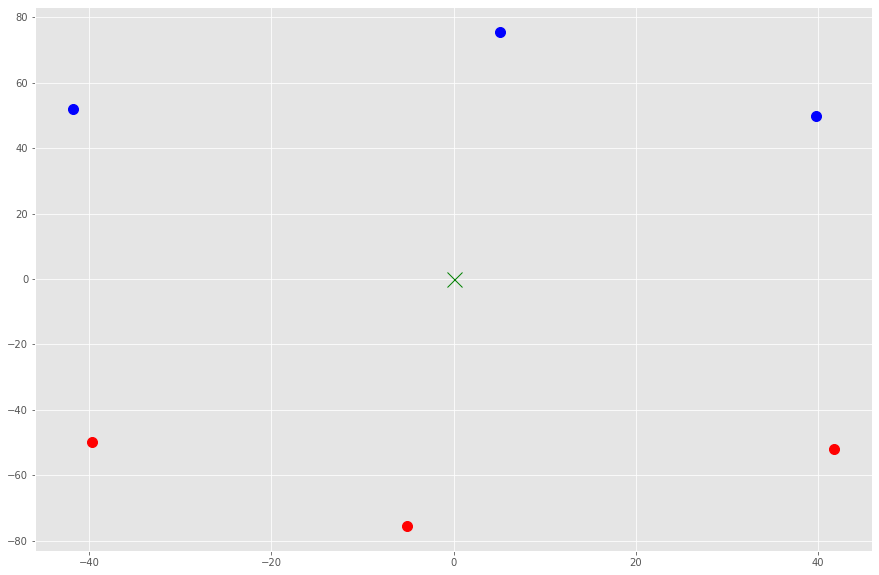

In [67]:
plt.figure(figsize=(15, 10))
plt.style.use('ggplot')
plt.plot(train0_df.loc[0, 'ball_pos_x'], train0_df.loc[0, 'ball_pos_y'], 'gx', markersize=15)
for i in range(3):
    plt.plot(train0_df.loc[0, f'p{i}_pos_x'], train0_df.loc[0, f'p{i}_pos_y'], 'ro', markersize=10)
    plt.plot(train0_df.loc[0, f'p{i + 3}_pos_x'], train0_df.loc[0, f'p{i + 3}_pos_y'], 'bo', markersize=10)

plt.show()

### Remove columns

In [68]:
train0_df.drop(columns= ['game_num', 'event_id', 'event_time', 
                         'player_scoring_next', 'team_scoring_next'], inplace= True)

In [69]:
train0_df.columns

Index(['ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x', 'ball_vel_y',
       'ball_vel_z', 'p0_pos_x', 'p0_pos_y', 'p0_pos_z', 'p0_vel_x',
       'p0_vel_y', 'p0_vel_z', 'p0_boost', 'p1_pos_x', 'p1_pos_y', 'p1_pos_z',
       'p1_vel_x', 'p1_vel_y', 'p1_vel_z', 'p1_boost', 'p2_pos_x', 'p2_pos_y',
       'p2_pos_z', 'p2_vel_x', 'p2_vel_y', 'p2_vel_z', 'p2_boost', 'p3_pos_x',
       'p3_pos_y', 'p3_pos_z', 'p3_vel_x', 'p3_vel_y', 'p3_vel_z', 'p3_boost',
       'p4_pos_x', 'p4_pos_y', 'p4_pos_z', 'p4_vel_x', 'p4_vel_y', 'p4_vel_z',
       'p4_boost', 'p5_pos_x', 'p5_pos_y', 'p5_pos_z', 'p5_vel_x', 'p5_vel_y',
       'p5_vel_z', 'p5_boost', 'boost0_timer', 'boost1_timer', 'boost2_timer',
       'boost3_timer', 'boost4_timer', 'boost5_timer',
       'team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'],
      dtype='object')

In [70]:
train0_df.fillna(0, inplace=True)

In [71]:
train0_df.isnull().sum()

ball_pos_x                     0
ball_pos_y                     0
ball_pos_z                     0
ball_vel_x                     0
ball_vel_y                     0
ball_vel_z                     0
p0_pos_x                       0
p0_pos_y                       0
p0_pos_z                       0
p0_vel_x                       0
p0_vel_y                       0
p0_vel_z                       0
p0_boost                       0
p1_pos_x                       0
p1_pos_y                       0
p1_pos_z                       0
p1_vel_x                       0
p1_vel_y                       0
p1_vel_z                       0
p1_boost                       0
p2_pos_x                       0
p2_pos_y                       0
p2_pos_z                       0
p2_vel_x                       0
p2_vel_y                       0
p2_vel_z                       0
p2_boost                       0
p3_pos_x                       0
p3_pos_y                       0
p3_pos_z                       0
p3_vel_x  

### Feature engineering

#### Distance between each player & the ball

In [72]:
train0_df.head()

,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,p0_vel_y,p0_vel_z,p0_boost,p1_pos_x,p1_pos_y,p1_pos_z,p1_vel_x,p1_vel_y,p1_vel_z,p1_boost,p2_pos_x,p2_pos_y,p2_pos_z,p2_vel_x,p2_vel_y,p2_vel_z,p2_boost,p3_pos_x,p3_pos_y,p3_pos_z,p3_vel_x,p3_vel_y,p3_vel_z,p3_boost,p4_pos_x,p4_pos_y,p4_pos_z,p4_vel_x,p4_vel_y,p4_vel_z,p4_boost,p5_pos_x,p5_pos_y,p5_pos_z,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,-0.0,0.0,1.8548,-0.0,0.0,0.0,41.804798,-51.924999,0.3402,5.635400,-4.8490,0.0042,33.34375,-5.0654,-75.519402,0.3402,0.3602,9.960600,0.0000,27.328125,-39.654400,-49.894398,0.3402,8.8092,8.809400,0.0000,22.343750,5.0604,75.532005,0.3402,-0.5236,-8.050600,0.0042,33.34375,-41.766403,52.006401,0.3410,-5.437600,5.437800,0.0052,33.34375,39.757401,49.821602,0.3402,-8.227600,-9.275200,-0.0002,22.343750,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,-0.0,0.0,1.8548,-0.0,0.0,0.0,42.261600,-52.451202,0.3402,5.287199,-7.4774,0.0042,33.34375,-4.9298,-74.326401,0.4900,2.2634,13.568199,6.0700,23.843750,-38.626202,-48.871803,0.3402,11.6062,11.244201,0.0000,30.625000,5.0110,74.772995,0.3402,-0.6998,-9.942000,0.0042,33.34375,-42.407204,52.622402,0.5944,-7.172400,6.739800,6.2394,33.34375,38.781399,48.761402,0.3402,-11.337800,-11.244000,0.0002,30.625000,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.227001,-54.054001,1.1466,5.686000,-9.7462,6.5052,33.34375,-4.6880,-72.959000,1.0820,2.7758,15.537000,6.3438,23.140625,-36.345200,-47.016201,1.1346,16.1252,12.458200,6.2390,26.890625,4.9168,73.767601,0.3402,-1.1922,-11.803600,0.0042,33.34375,-43.778198,54.081402,1.6450,-12.416600,15.706600,6.0082,33.34375,36.503998,46.920601,1.0214,-16.357201,-12.203199,6.2126,26.890625,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.898399,-55.225601,1.5936,10.595600,-18.5704,5.5184,33.34375,-3.8408,-69.125801,1.9106,5.6770,25.291800,4.2014,23.140625,-35.173599,-45.287998,1.5598,15.8896,26.249199,5.1802,23.375000,4.6906,71.631401,0.4394,-1.7122,-15.544201,5.9916,31.00000,-44.919800,55.525200,2.1334,-12.483199,15.779799,4.7494,33.34375,35.151798,44.873398,1.5286,-14.602800,-26.306002,4.9346,23.375000,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,-0.0,0.0,1.8548,-0.0,0.0,0.0,44.960602,-57.087799,2.0720,10.632600,-18.6378,4.1670,33.34375,-3.2720,-66.594398,1.9814,5.6902,25.318401,-0.3020,23.140625,-34.066002,-43.518997,1.8632,17.1810,26.739599,4.0358,19.843750,4.5010,69.921600,1.0822,-2.0104,-18.120399,6.3364,27.46875,-46.170399,57.104401,2.2552,-12.518800,15.799200,-0.2730,33.34375,33.584801,42.203400,1.9106,-16.576401,-27.024799,1.3248,19.843750,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [73]:
for i in range(6):
    distance = (((train0_df[f'p{i}_pos_x'] - train0_df['ball_pos_x']) ** 2) 
         + ((train0_df[f'p{i}_pos_y'] - train0_df['ball_pos_y']) ** 2) 
         + ((train0_df[f'p{i}_pos_z'] - train0_df['ball_pos_z']) ** 2)) ** 0.5
    train0_df[f'dist_p{i}_ball'] = distance

#### Get the absolute velocity

In [74]:
train0_df['abs_ball_v'] = ((train0_df['ball_vel_x'] ** 2) 
                           + (train0_df['ball_vel_y'] ** 2) 
                           + (train0_df['ball_vel_z'] ** 2)) ** 0.5

In [75]:
for i in range(6):
    train0_df[f'abs_p{i}_v'] = ((train0_df[f'p{i}_vel_x'] ** 2) 
                           + (train0_df[f'p{i}_vel_y'] ** 2) 
                           + (train0_df[f'p{i}_vel_z'] ** 2)) ** 0.5

#### Get the direction of each player & the ball

In [76]:
ball_magnitude = ((train0_df['ball_pos_x'] ** 2) 
                  + (train0_df['ball_pos_y'] ** 2) 
                  + (train0_df['ball_pos_z'] ** 2)) ** 0.5
train0_df['ball_cos_x'] = train0_df['ball_pos_x'] / ball_magnitude
train0_df['ball_cos_y'] = train0_df['ball_pos_y'] / ball_magnitude
train0_df['ball_cos_z'] = train0_df['ball_pos_z'] / ball_magnitude

In [77]:
for i in range(6):
    magnitude = ((train0_df[f'p{i}_pos_x'] ** 2) 
                + (train0_df[f'p{i}_pos_y'] ** 2) 
                + (train0_df[f'p{i}_pos_z'] ** 2)) ** 0.5
    train0_df[f'p{i}_cos_x'] = train0_df[f'p{i}_pos_x'] / magnitude
    train0_df[f'p{i}_cos_y'] = train0_df[f'p{i}_pos_y'] / magnitude
    train0_df[f'p{i}_cos_z'] = train0_df[f'p{i}_pos_z'] / magnitude
    

In [78]:
train0_df.head()

,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,p0_vel_y,p0_vel_z,p0_boost,p1_pos_x,p1_pos_y,p1_pos_z,p1_vel_x,p1_vel_y,p1_vel_z,p1_boost,p2_pos_x,p2_pos_y,p2_pos_z,p2_vel_x,p2_vel_y,p2_vel_z,p2_boost,p3_pos_x,p3_pos_y,p3_pos_z,...,dist_p4_ball,dist_p5_ball,abs_ball_v,abs_p0_v,abs_p1_v,abs_p2_v,abs_p3_v,abs_p4_v,abs_p5_v,ball_cos_x,ball_cos_y,ball_cos_z,p0_cos_x,p0_cos_y,p0_cos_z,p1_cos_x,p1_cos_y,p1_cos_z,p2_cos_x,p2_cos_y,p2_cos_z,p3_cos_x,p3_cos_y,p3_cos_z,p4_cos_x,p4_cos_y,p4_cos_z,p5_cos_x,p5_cos_y,p5_cos_z
0,-0.0,0.0,1.8548,-0.0,0.0,0.0,41.804798,-51.924999,0.3402,5.635400,-4.8490,0.0042,33.34375,-5.0654,-75.519402,0.3402,0.3602,9.960600,0.0000,27.328125,-39.654400,-49.894398,0.3402,8.8092,8.809400,0.0000,22.343750,5.0604,75.532005,0.3402,...,66.718735,63.758425,0.0,7.434417,9.967111,12.458232,8.067610,7.690071,12.398498,-0.0,0.0,1.0,0.627106,-0.778917,0.005103,-0.066923,-0.997748,0.004495,-0.622185,-0.782852,0.005338,0.066846,0.997753,0.004494,-0.626160,0.779678,0.005112,0.623730,0.781621,0.005337
1,-0.0,0.0,1.8548,-0.0,0.0,0.0,42.261600,-52.451202,0.3402,5.287199,-7.4774,0.0042,33.34375,-4.9298,-74.326401,0.4900,2.2634,13.568199,6.0700,23.843750,-38.626202,-48.871803,0.3402,11.6062,11.244201,0.0000,30.625000,5.0110,74.772995,0.3402,...,67.594946,62.321468,0.0,9.157838,15.035422,16.159701,9.966600,11.653254,15.967882,-0.0,0.0,1.0,0.627405,-0.778677,0.005051,-0.066180,-0.997786,0.006578,-0.620062,-0.784534,0.005461,0.066865,0.997752,0.004540,-0.627457,0.778601,0.008795,0.622455,0.782637,0.005460
2,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.227001,-54.054001,1.1466,5.686000,-9.7462,6.5052,33.34375,-4.6880,-72.959000,1.0820,2.7758,15.537000,6.3438,23.140625,-36.345200,-47.016201,1.1346,16.1252,12.458200,6.2390,26.890625,4.9168,73.767601,0.3402,...,69.579972,59.454008,0.0,13.024463,17.010210,21.310888,11.863656,20.903773,21.332428,-0.0,0.0,1.0,0.624467,-0.780876,0.016564,-0.064116,-0.997833,0.014798,-0.611489,-0.791023,0.019089,0.066504,0.997776,0.004602,-0.629005,0.777042,0.023635,0.613957,0.789153,0.017179
3,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.898399,-55.225601,1.5936,10.595600,-18.5704,5.5184,33.34375,-3.8408,-69.125801,1.9106,5.6770,25.291800,4.2014,23.140625,-35.173599,-45.287998,1.5598,15.8896,26.249199,5.1802,23.375000,4.6906,71.631401,0.4394,...,71.420684,57.003309,0.0,22.081197,26.259383,31.118070,16.746733,20.673392,30.489306,-0.0,0.0,1.0,0.622095,-0.782616,0.022583,-0.055456,-0.998080,0.027586,-0.613166,-0.789486,0.027191,0.065341,0.997844,0.006121,-0.628671,0.777098,0.029858,0.616451,0.786937,0.026807
4,-0.0,0.0,1.8548,-0.0,0.0,0.0,44.960602,-57.087799,2.0720,10.632600,-18.6378,4.1670,33.34375,-3.2720,-66.594398,1.9814,5.6902,25.318401,-0.3020,23.140625,-34.066002,-43.518997,1.8632,17.1810,26.739599,4.0358,19.843750,4.5010,69.921600,1.0822,...,73.435539,53.935787,0.0,21.858263,25.951705,32.038736,19.301310,20.159603,31.731245,-0.0,0.0,1.0,0.618471,-0.785291,0.028502,-0.049052,-0.998354,0.029704,-0.616044,-0.786991,0.033694,0.064231,0.997816,0.015444,-0.628433,0.777258,0.030696,0.622291,0.781985,0.035401


In [79]:
train0_df.loc[:, 'ball_cos_x':] = np.degrees(np.arccos(train0_df.loc[:, 'ball_cos_x':]))
train0_df.fillna(0, inplace= True)

In [80]:
train0_df.isnull().sum()

ball_pos_x    0
ball_pos_y    0
ball_pos_z    0
ball_vel_x    0
ball_vel_y    0
             ..
p4_cos_y      0
p4_cos_z      0
p5_cos_x      0
p5_cos_y      0
p5_cos_z      0
Length: 90, dtype: int64

In [82]:
train0_df.head()

,ball_pos_x,ball_pos_y,ball_pos_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_boost,p1_pos_x,p1_pos_y,p1_pos_z,p1_boost,p2_pos_x,p2_pos_y,p2_pos_z,p2_boost,p3_pos_x,p3_pos_y,p3_pos_z,p3_boost,p4_pos_x,p4_pos_y,p4_pos_z,p4_boost,p5_pos_x,p5_pos_y,p5_pos_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,...,dist_p4_ball,dist_p5_ball,abs_ball_v,abs_p0_v,abs_p1_v,abs_p2_v,abs_p3_v,abs_p4_v,abs_p5_v,ball_cos_x,ball_cos_y,ball_cos_z,p0_cos_x,p0_cos_y,p0_cos_z,p1_cos_x,p1_cos_y,p1_cos_z,p2_cos_x,p2_cos_y,p2_cos_z,p3_cos_x,p3_cos_y,p3_cos_z,p4_cos_x,p4_cos_y,p4_cos_z,p5_cos_x,p5_cos_y,p5_cos_z
0,-0.0,0.0,1.8548,41.804798,-51.924999,0.3402,33.34375,-5.0654,-75.519402,0.3402,27.328125,-39.654400,-49.894398,0.3402,22.343750,5.0604,75.532005,0.3402,33.34375,-41.766403,52.006401,0.3410,33.34375,39.757401,49.821602,0.3402,22.343750,0.0,0.0,0.0,...,66.718735,63.758425,0.0,7.434417,9.967111,12.458232,8.067610,7.690071,12.398498,90.0,90.0,0.008314,51.163072,141.161545,89.707603,93.837279,176.154057,89.742474,128.475855,141.522469,89.694165,86.167135,3.841524,89.742516,128.767389,38.768921,89.707088,51.410950,38.590721,89.694200
1,-0.0,0.0,1.8548,42.261600,-52.451202,0.3402,33.34375,-4.9298,-74.326401,0.4900,23.843750,-38.626202,-48.871803,0.3402,30.625000,5.0110,74.772995,0.3402,33.34375,-42.407204,52.622402,0.5944,33.34375,38.781399,48.761402,0.3402,30.625000,0.0,0.0,0.0,...,67.594946,62.321468,0.0,9.157838,15.035422,16.159701,9.966600,11.653254,15.967882,90.0,90.0,0.008314,51.141091,141.139597,89.710625,93.794581,176.186682,89.623109,128.320675,141.677571,89.687095,86.166029,3.842842,89.739903,128.862768,38.867308,89.496092,51.504402,38.497353,89.687145
2,-0.0,0.0,1.8548,43.227001,-54.054001,1.1466,33.34375,-4.6880,-72.959000,1.0820,23.140625,-36.345200,-47.016201,1.1346,26.890625,4.9168,73.767601,0.3402,33.34375,-43.778198,54.081402,1.6450,33.34375,36.503998,46.920601,1.0214,26.890625,0.0,0.0,0.0,...,69.579972,59.454008,0.0,13.024463,17.010210,21.310888,11.863656,20.903773,21.332428,90.0,90.0,0.008314,51.356948,141.340836,89.050907,93.676098,176.227092,89.152100,127.697232,142.281196,88.906212,86.186770,3.822368,89.736351,128.976769,39.009493,88.645667,52.123835,37.893605,89.015678
3,-0.0,0.0,1.8548,43.898399,-55.225601,1.5936,33.34375,-3.8408,-69.125801,1.9106,23.140625,-35.173599,-45.287998,1.5598,23.375000,4.6906,71.631401,0.4394,31.00000,-44.919800,55.525200,2.1334,33.34375,35.151798,44.873398,1.5286,23.375000,0.0,0.0,0.0,...,71.420684,57.003309,0.0,22.081197,26.259383,31.118070,16.746733,20.673392,30.489306,90.0,90.0,0.008314,51.530700,141.500706,88.705962,93.179013,176.448895,88.419216,127.818782,142.137500,88.441860,86.253551,3.762877,89.649293,128.952142,39.004370,88.289019,51.942579,38.099827,88.463900
4,-0.0,0.0,1.8548,44.960602,-57.087799,2.0720,33.34375,-3.2720,-66.594398,1.9814,23.140625,-34.066002,-43.518997,1.8632,19.843750,4.5010,69.921600,1.0822,27.46875,-46.170399,57.104401,2.2552,33.34375,33.584801,42.203400,1.9106,19.843750,0.0,0.0,0.0,...,73.435539,53.935787,0.0,21.858263,25.951705,32.038736,19.301310,20.159603,31.731245,90.0,90.0,0.008314,51.795445,141.747569,88.366729,92.811624,176.712557,88.297819,128.027833,141.905168,88.069121,86.317272,3.787840,89.115116,128.934618,38.989824,88.240977,51.516354,38.557332,87.971224


In [83]:
train0_df_label = train0_df[['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec']]
train0_df.drop(columns= ['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'], inplace= True)
train0_df_label.head()

,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [84]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train0_df)

#### Perform simple logistic regression

In [85]:
model_a = LogisticRegression()
model_b = LogisticRegression()

In [86]:
model_a.fit(scaled_data, train0_df_label.iloc[:,0])
model_b.fit(scaled_data, train0_df_label.iloc[:,1])

LogisticRegression()

#### Load test data

In [87]:
dtypes_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv')
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/test.csv', dtype=dtypes)

In [88]:
test_df.drop(columns= ['id'], inplace= True)

In [89]:
train0_df.fillna(0, inplace=True)

In [90]:
for i in range(6):
    distance = (((test_df[f'p{i}_pos_x'] - test_df['ball_pos_x']) ** 2) 
         + ((test_df[f'p{i}_pos_y'] - test_df['ball_pos_y']) ** 2) 
         + ((test_df[f'p{i}_pos_z'] - test_df['ball_pos_z']) ** 2)) ** 0.5
    test_df[f'dist_p{i}_ball'] = distance

In [91]:
test_df['abs_ball_v'] = ((test_df['ball_vel_x'] ** 2) 
                           + (test_df['ball_vel_y'] ** 2) 
                           + (test_df['ball_vel_z'] ** 2)) ** 0.5

In [92]:
for i in range(6):
    test_df[f'abs_p{i}_v'] = ((test_df[f'p{i}_vel_x'] ** 2) 
                           + (test_df[f'p{i}_vel_y'] ** 2) 
                           + (test_df[f'p{i}_vel_z'] ** 2)) ** 0.5

In [93]:
ball_magnitude = ((test_df['ball_pos_x'] ** 2) 
                  + (test_df['ball_pos_y'] ** 2) 
                  + (test_df['ball_pos_z'] ** 2)) ** 0.5
test_df['ball_cos_x'] = test_df['ball_pos_x'] / ball_magnitude
test_df['ball_cos_y'] = test_df['ball_pos_y'] / ball_magnitude
test_df['ball_cos_z'] = test_df['ball_pos_z'] / ball_magnitude

In [94]:
for i in range(6):
    magnitude = ((test_df[f'p{i}_pos_x'] ** 2) 
                + (test_df[f'p{i}_pos_y'] ** 2) 
                + (test_df[f'p{i}_pos_z'] ** 2)) ** 0.5
    test_df[f'p{i}_cos_x'] = test_df[f'p{i}_pos_x'] / magnitude
    test_df[f'p{i}_cos_y'] = test_df[f'p{i}_pos_y'] / magnitude
    test_df[f'p{i}_cos_z'] = test_df[f'p{i}_pos_z'] / magnitude
    

In [95]:
test_df.loc[:, 'ball_cos_x':] = np.degrees(np.arccos(test_df.loc[:, 'ball_cos_x':]))
test_df.fillna(0, inplace= True)

In [97]:
test_scaler = StandardScaler()
test_scaled_data = scaler.fit_transform(test_df)

In [98]:
a_prediction = model_a.predict_proba(test_scaled_data)[:, 1]
b_prediction = model_b.predict_proba(test_scaled_data)[:, 1]

#### Submission

In [99]:
submission = pd.read_csv('../input/tabular-playground-series-oct-2022/sample_submission.csv')
submission['team_A_scoring_within_10sec'] = a_prediction
submission['team_B_scoring_within_10sec'] = b_prediction
submission.to_csv('submission.csv', index = False)
submission

,id,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,0,0.044401,0.053896
1,1,0.124099,0.041936
2,2,0.010773,0.174245
3,3,0.074956,0.031329
4,4,0.019997,0.045594
...,...,...,...
701138,701138,0.149444,0.032259
701139,701139,0.026902,0.053426
701140,701140,0.041693,0.063849
701141,701141,0.008232,0.164021
